## Demographic Analysis of the Nashville Creative Community Survey

Welcome to the demographic analysis of the Nashville Creative Community Survey! In this notebook, we'll explore the characteristics of the survey's respondents and understand how different roles in the creative community interacted with the survey.

### Data Cleaning Steps

Before diving into the analysis, let's first prepare our data. We'll start by reading in the provided survey data.

In [1]:
import pandas as pd
#Load the dataset and save to dataframe
df_survey = pd.read_excel('2023-cleaned-survey.xlsx')


#Display dataframe to analyze raw data
df_survey.head()

,Time of Response,Postal Code,Describe Your Location,Identified Gender,Age,Select Your Race/Ethnicity,Identify Membership in Given Populations,Describe Your Primary Role in Creative Sector,Primary Creative Activity,Years of Professional Creative Practice,...,Did you know The Non-Profit offers free legal and professional services to eligible artists and arts organizations in The Area through our VLPA program?,"If so, have you ever used the VLPA's legal or business services?",Are you considering using the VLPA's free legal or business services in the future?,"If not, could you share your reasons?.1",Do you plan to remain in The Area for more than the next 2-3 years?,"If you're undecided or planning to leave, why? (Select all that apply)",Any other comments on your reasons for staying in or departing from The Area's creative ecosystem?,What three words come to mind when you think of the Arts & Business Council of Greater Nashville?,"Please suggest any additional volunteer, educational, or other services that The Non-Profit could provide:",Feel free to share any additional insights about The Non-Profit or The Area's Creative Economy not covered in this survey:
0,2023-05-01 03:25:24.187,37721,Urban,Prefer not to say,Older Adults (Age 65+),Hispanic or Latinx,K-12 Students,"Creative Worker (In-house graphic designers, c...",NaN,NaN,...,Yes,No,Maybe,NaN,NaN,My reason is not related to my artistic practice,The Area has given me both challenges and rewa...,"Thrive, Engage, Motivate",Online platform for showcasing local talent.,NaN
1,2023-05-01 03:38:28.091,31291,Suburban,Female,Children/Youth (Age 0-18),Asian,Individuals living in neighborhoods with limit...,"Arts Administrator (Theater managers, developm...",NaN,NaN,...,No,Yes,Yes,NaN,"No, I am retiring soon.",Perceived lack of accessible artistic/creative...,Personal and professional growth are my main r...,NaN,Counseling services for artists.,Ensuring artists receive fair compensation is ...
2,2023-05-01 03:53:54.634,38155,Urban,Female,Adults (Age 25-64),Prefer not to say,NaN,"Arts Funder (Foundations; national, state, and...",NaN,NaN,...,No,No,Maybe,NaN,NaN,Perceived lack of artistic support from the city,NaN,"Resourceful, Advocate, Partner",NaN,Feedback mechanisms for artists and stakeholde...
3,2023-05-01 06:32:42.548,39888,Rural,Prefer not to say,Prefer not to say,Prefer not to say,New Americans (immigrants and refugees)*,"Business Professional (Attorneys, bankers, CPA...",NaN,NaN,...,No,Yes,Yes,NaN,"No, Im considering relocating for better oppor...",My reason is not related to my artistic practice,NaN,NaN,NaN,NaN
4,2023-05-01 08:17:28.339,30154,Urban,Male,Adults (Age 25-64),Hispanic or Latinx,K-12 Students,Civic and/or Social Service Worker (Social wor...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here's a snapshot of the data we've loaded. Each row represents a respondent, while the columns capture their answers to the survey questions.

Given the vast number of columns, it's essential first to understand our dataset's completeness. We'll inspect the percentage of missing values, the column headers, and the data types to uncover any irregularities.

The table above shows the percentage of missing values for each column. This helps us decide which columns to retain and which ones might need further attention.

In [2]:
#Check percentage of missing values for each column
missing_percentage = df_survey.isnull().mean().sort_values(ascending=False)

#Display first 10 columns
missing_percentage.head(10)

Online Learning Trend Post-Pandemic                                                                                    1.0
Rate Barriers to Success for Artists/Educators Perceived lack of support from the government (municipal, state)        1.0
Rate Barriers to Success for Artists/Educators Ongoing restrictions due to the COVID-19 pandemic12                     1.0
Rate Barriers to Success for Artists/Educators Lack of the necessary equipment and/or technology                       1.0
Rate Barriers to Success for Artists/Educators Inability to host in-person events                                      1.0
Rate Barriers to Success for Artists/Educators Transportation                                                          1.0
Rate Barriers to Success for Artists/Educators Too many competing priorities, not enough time                          1.0
Rate Barriers to Success for Artists/Educators Perceived lack of support from the private sector/business community    1.0
Rate Barriers to

We notice some columns have no data at all (100% missing). Since these columns don't provide any insights, we'll remove them from our dataset.

In [3]:
#Remove columns with 100% missing values
df_survey_cleaned = df_survey.loc[:, missing_percentage < 1]

#Display the shape of the cleaned dataframe
df_survey_cleaned.shape

(350, 248)

Checking data types ensures that each column is stored in the appropriate format. For instance, numerical answers should be stored as numbers, and textual answers as strings.

In [4]:
#Grab data types of the columns
data_types = df_survey_cleaned.dtypes

#Display first 10 data types
data_types.head(10)

Time of Response                                 datetime64[ns]
Postal Code                                               int64
Describe Your Location                                   object
Identified Gender                                        object
Age                                                      object
Select Your Race/Ethnicity                               object
Identify Membership in Given Populations                 object
Describe Your Primary Role in Creative Sector            object
Primary Creative Activity                                object
Years of Professional Creative Practice                  object
dtype: object

This code extracts the unique responses for the first ten columns of our cleaned survey data. These columns are likely categorical in nature, and by identifying the unique values within them, we gain insights into the range of answers provided by respondents. This step helps us understand the diversity of responses and ensures that the data has been categorized correctly.

In [5]:
#Grab unique values for categorical columns
unique_values = {column: df_survey_cleaned[column].unique() for column in df_survey_cleaned.columns[:10]}
unique_values

{'Time of Response': array(['2023-05-01T03:25:24.187000000', '2023-05-01T03:38:28.091000000',
        '2023-05-01T03:53:54.634000000', '2023-05-01T06:32:42.548000000',
        '2023-05-01T08:17:28.339000000', '2023-05-01T11:22:56.926000000',
        '2023-05-01T16:41:12.806000000', '2023-05-01T21:02:44.154000000',
        '2023-05-01T23:42:23.069000000', '2023-05-02T02:11:55.481000000',
        '2023-05-02T03:44:08.314000000', '2023-05-02T05:16:32.318000000',
        '2023-05-02T09:03:44.197000000', '2023-05-02T09:42:20.317000000',
        '2023-05-02T15:01:36.048000000', '2023-05-02T19:42:09.844000000',
        '2023-05-02T21:27:29.189000000', '2023-05-02T22:37:33.321000000',
        '2023-05-03T03:59:58.831000000', '2023-05-03T06:32:22.592000000',
        '2023-05-03T18:20:42.532000000', '2023-05-04T01:20:38.434000000',
        '2023-05-04T04:24:28.155000000', '2023-05-04T06:24:47.115000000',
        '2023-05-04T06:24:52.333000000', '2023-05-04T06:41:07.098000000',
        '2023-05-0

This code lists all the column headers from our cleaned survey dataset. These headers represent the questions or data points captured in the survey. By displaying them, we get an overview of the different topics and areas of interest addressed in the survey.

In [6]:
#Get column headers
df_survey_cleaned.columns

Index(['Time of Response', 'Postal Code', 'Describe Your Location',
       'Identified Gender', 'Age', 'Select Your Race/Ethnicity',
       'Identify Membership in Given Populations',
       'Describe Your Primary Role in Creative Sector',
       'Primary Creative Activity', 'Years of Professional Creative Practice',
       ...
       'Which topics would you most like to see addressed in a workshop or seminar? (Check all that apply)',
       'Did you know The Non-Profit offers free legal and professional services to eligible artists and arts organizations in The Area through our VLPA program?',
       'If so, have you ever used the VLPA's legal or business services?',
       'Are you considering using the VLPA's free legal or business services in the future?',
       'Do you plan to remain in The Area for more than the next 2-3 years?',
       'If you're undecided or planning to leave, why? (Select all that apply)',
       'Any other comments on your reasons for staying in or departing

### Filling in NaNs

Even after our initial data cleaning, the dataset still contains numerous missing values. To address this, we've segmented the data into seven distinct dataframes, each representing a specific role in the creative community. Our strategy is to fill the missing values within each role-specific subset by drawing from a random sample of available responses. We believe this approach is appropriate because individuals with similar roles in the creative sector likely have comparable perspectives and experiences, making their survey responses more aligned. Random sampling, in this context, ensures fairness and helps in preserving the general characteristics of responses within each role.



First we organize the survey data based on the roles people identified with in the creative sector. We made sure everyone's roles were named consistently. Then, we separated the responses so that each role has its own set of answers.

By doing this, we can look at answers from specific groups, like 'Creative Entrepreneurs'. As an example, we're showing the data for this group below.



In [7]:
#Adjusting roles list based on actual unique values in the column
roles_mapping = {
    "Creative Entrepreneurs": "Creative Entrepreneurs",
    "Creative Workers": "Creative Worker",
    "Arts Administrators": "Arts Administrator",
    "Arts Educators or Teaching Artists": "Arts Educator or Teaching Artist",
    "Arts Funders": "Arts Funder",
    "Business Professionals": "Business Professional",
    "Civic and/or Social Service Workers": "Civic and/or Social Service Worker"
}

#Loop through each role to filter dataframe based on the role and save to the corrected dictionary
df_roles_final = {}

for original_role, mapped_role in roles_mapping.items():
    df_roles_final[original_role] = df_survey_cleaned[df_survey_cleaned["Describe Your Primary Role in Creative Sector"].str.contains(mapped_role, na=False)]

#Get shape of each dataframe to check the number of rows for each role in the final dictionary
role_shapes_final = {role: df.shape[0] for role, df in df_roles_final.items()}

#To see entire dataframe categorized by roles, use 'df_roles_final'
#To see dataframe of different role, change the string inside df_roles_final
#Display dataframe for Creative Entrepreneurs
df_roles_final['Creative Entrepreneurs'].head()

,Time of Response,Postal Code,Describe Your Location,Identified Gender,Age,Select Your Race/Ethnicity,Identify Membership in Given Populations,Describe Your Primary Role in Creative Sector,Primary Creative Activity,Years of Professional Creative Practice,...,Which topics would you most like to see addressed in a workshop or seminar? (Check all that apply),Did you know The Non-Profit offers free legal and professional services to eligible artists and arts organizations in The Area through our VLPA program?,"If so, have you ever used the VLPA's legal or business services?",Are you considering using the VLPA's free legal or business services in the future?,Do you plan to remain in The Area for more than the next 2-3 years?,"If you're undecided or planning to leave, why? (Select all that apply)",Any other comments on your reasons for staying in or departing from The Area's creative ecosystem?,What three words come to mind when you think of the Arts & Business Council of Greater Nashville?,"Please suggest any additional volunteer, educational, or other services that The Non-Profit could provide:",Feel free to share any additional insights about The Non-Profit or The Area's Creative Economy not covered in this survey:
6,2023-05-01 16:41:12.806,36235,Suburban,Non-binary,Prefer not to say,Native Hawaiian or Other Pacific Islander,Individuals with disabilities,"Creative Entrepreneurs (Artists, performers, m...",NaN,6-10 years,...,Low-Cost Marketing Methods,No,Yes,No,"Maybe, its a hard decision.",Perceived lack of creative career opportunities,NaN,"Thoughtful, Reflective, Meaningful",Workshops on sustainable art practices.,NaN
10,2023-05-02 03:44:08.314,38838,Rural,Non-binary,Young Adults (Age 19-24),Black or African American,Individuals with Limited English Proficiency,"Creative Entrepreneurs (Artists, performers, m...",Calligraphy,11-20 years,...,Genre-specific Software Training (such as Fina...,Yes,Yes,No,NaN,Perceived lack of educational opportunities to...,Its a great place for networking.,"Awe-inspiring, Memorable, Lasting",NaN,There’s a need for more diverse leadership in ...
23,2023-05-04 06:24:47.115,36420,Suburban,Prefer not to say,Older Adults (Age 65+),Prefer not to say,New Americans (immigrants and refugees)*,"Creative Entrepreneurs (Artists, performers, m...",Installation Art,0-5 years,...,Time Management,Yes,No,Yes,"Yes, my studio space is ideal here.",Open to professional work opportunities outsid...,I want to explore and get global exposure.,"Engaging, Interactive, Insightful",A directory of local artists and their expertise.,I wish the Non-Profit had a stronger online pr...
29,2023-05-04 09:18:14.423,32047,Urban,Male,Adults (Age 25-64),American Indian/Alaska Native,Military Veterans/Active Duty Personnel,"Creative Entrepreneurs (Artists, performers, m...",Mixed Media Art,0-5 years,...,Accounting Best Practices,Yes,No,Maybe,"Maybe, depends on family decisions.",Perceived lack of artistic support from the city,NaN,"Revolutionary, Game-changer, Significant",NaN,The Area is becoming a global art destination.
34,2023-05-05 04:59:48.817,31184,Urban,Male,Children/Youth (Age 0-18),American Indian/Alaska Native,People of Color (American Indian/Alaska Native,"Creative Entrepreneurs (Artists, performers, m...",Drawing,20+ years,...,Genre-specific Software Training (such as Fina...,No,No,Maybe,NaN,Personal/professional openminded-ness to reloc...,NaN,NaN,NaN,The Area has so much untapped talent that need...


We're now taking steps to fill in the gaps or missing answers in our survey data for each role. Our approach is simple: if a response is missing for a specific question, we replace it with a random answer from someone else who has the same role. This way, we're using real answers from similar respondents to fill in the blanks.

After making these replacements, we can check the data to ensure the missing values are filled in. Below, we're showing the updated data for the 'Creative Entrepreneurs' group as an example.

In [8]:
# Loop through each role-specific dataframe
for role, df in df_roles_final.items():
    
    # Create a mask of NaN values for each column
    for col in df.columns:
        
        # Find rows with NaN values in the current column
        nan_rows = df[col].isnull()
        
        # Ensure there are non-NaN values to sample from
        if nan_rows.sum() > 0 and df[col].dropna().shape[0] > 0:
            
            # Replace NaNs with a random sample of non-NaN values from the same column using .loc[]
            df.loc[nan_rows, col] = nan_rows.apply(lambda x: df[col].dropna().sample(1).iloc[0] if x else None)

# Display the dataframe for the 'Creative Entrepreneurs' role to verify if NaNs have been replaced
df_roles_final['Creative Entrepreneurs']


/usr/local/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Time of Response,Postal Code,Describe Your Location,Identified Gender,Age,Select Your Race/Ethnicity,Identify Membership in Given Populations,Describe Your Primary Role in Creative Sector,Primary Creative Activity,Years of Professional Creative Practice,...,Which topics would you most like to see addressed in a workshop or seminar? (Check all that apply),Did you know The Non-Profit offers free legal and professional services to eligible artists and arts organizations in The Area through our VLPA program?,"If so, have you ever used the VLPA's legal or business services?",Are you considering using the VLPA's free legal or business services in the future?,Do you plan to remain in The Area for more than the next 2-3 years?,"If you're undecided or planning to leave, why? (Select all that apply)",Any other comments on your reasons for staying in or departing from The Area's creative ecosystem?,What three words come to mind when you think of the Arts & Business Council of Greater Nashville?,"Please suggest any additional volunteer, educational, or other services that The Non-Profit could provide:",Feel free to share any additional insights about The Non-Profit or The Area's Creative Economy not covered in this survey:
6,2023-05-01 16:41:12.806,36235,Suburban,Non-binary,Prefer not to say,Native Hawaiian or Other Pacific Islander,Individuals with disabilities,"Creative Entrepreneurs (Artists, performers, m...",Printmaking,6-10 years,...,Low-Cost Marketing Methods,No,Yes,No,"Maybe, its a hard decision.",Perceived lack of creative career opportunities,"Ive been here too long, need fresh perspectives.","Thoughtful, Reflective, Meaningful",Workshops on sustainable art practices.,The Area is becoming a global art destination.
10,2023-05-02 03:44:08.314,38838,Rural,Non-binary,Young Adults (Age 19-24),Black or African American,Individuals with Limited English Proficiency,"Creative Entrepreneurs (Artists, performers, m...",Calligraphy,11-20 years,...,Genre-specific Software Training (such as Fina...,Yes,Yes,No,"No, not enough opportunities for growth.",Perceived lack of educational opportunities to...,Its a great place for networking.,"Awe-inspiring, Memorable, Lasting",Portfolio review sessions.,There’s a need for more diverse leadership in ...
23,2023-05-04 06:24:47.115,36420,Suburban,Prefer not to say,Older Adults (Age 65+),Prefer not to say,New Americans (immigrants and refugees)*,"Creative Entrepreneurs (Artists, performers, m...",Installation Art,0-5 years,...,Time Management,Yes,No,Yes,"Yes, my studio space is ideal here.",Open to professional work opportunities outsid...,I want to explore and get global exposure.,"Engaging, Interactive, Insightful",A directory of local artists and their expertise.,I wish the Non-Profit had a stronger online pr...
29,2023-05-04 09:18:14.423,32047,Urban,Male,Adults (Age 25-64),American Indian/Alaska Native,Military Veterans/Active Duty Personnel,"Creative Entrepreneurs (Artists, performers, m...",Mixed Media Art,0-5 years,...,Accounting Best Practices,Yes,No,Maybe,"Maybe, depends on family decisions.",Perceived lack of artistic support from the city,It lacks diversity in art forms.,"Revolutionary, Game-changer, Significant",Programs in schools to promote arts from a you...,The Area is becoming a global art destination.
34,2023-05-05 04:59:48.817,31184,Urban,Male,Children/Youth (Age 0-18),American Indian/Alaska Native,People of Color (American Indian/Alaska Native,"Creative Entrepreneurs (Artists, performers, m...",Drawing,20+ years,...,Genre-specific Software Training (such as Fina...,No,No,Maybe,"Maybe, I might get a residency elsewhere.",Personal/professional openminded-ness to reloc...,The ecosystem is too centered around a few art...,"Impactful, Authentic, Genuine",More workshops on digital art techniques.,The Area has so much untapped talent that need...
39,2023-05-06 11:33:20.017,35191,Rural,Prefer not to say,Young Adults (Age 19-24),Hispanic or Latinx,Individuals living in neighborhoods with limi

Now that we've individually addressed the missing values in each role-specific subset, we're bringing all these subsets back together into a single consolidated dataset. This combined dataset offers a complete view of the survey responses, with the missing values filled appropriately.

Once consolidated, we save this dataset into a new Excel file named "2023-organized-survey.xlsx" for future reference and analysis.

In [9]:
#Concantenate all dataframes into 1
df_concatenated = pd.concat(df_roles_final.values())
#Name new .xlsx file
output_filepath = "2023-organized-survey.xlsx"
#Save file
df_concatenated.to_excel(output_filepath, index=False)

# Preliminary Questions

## Who has taken the survey?

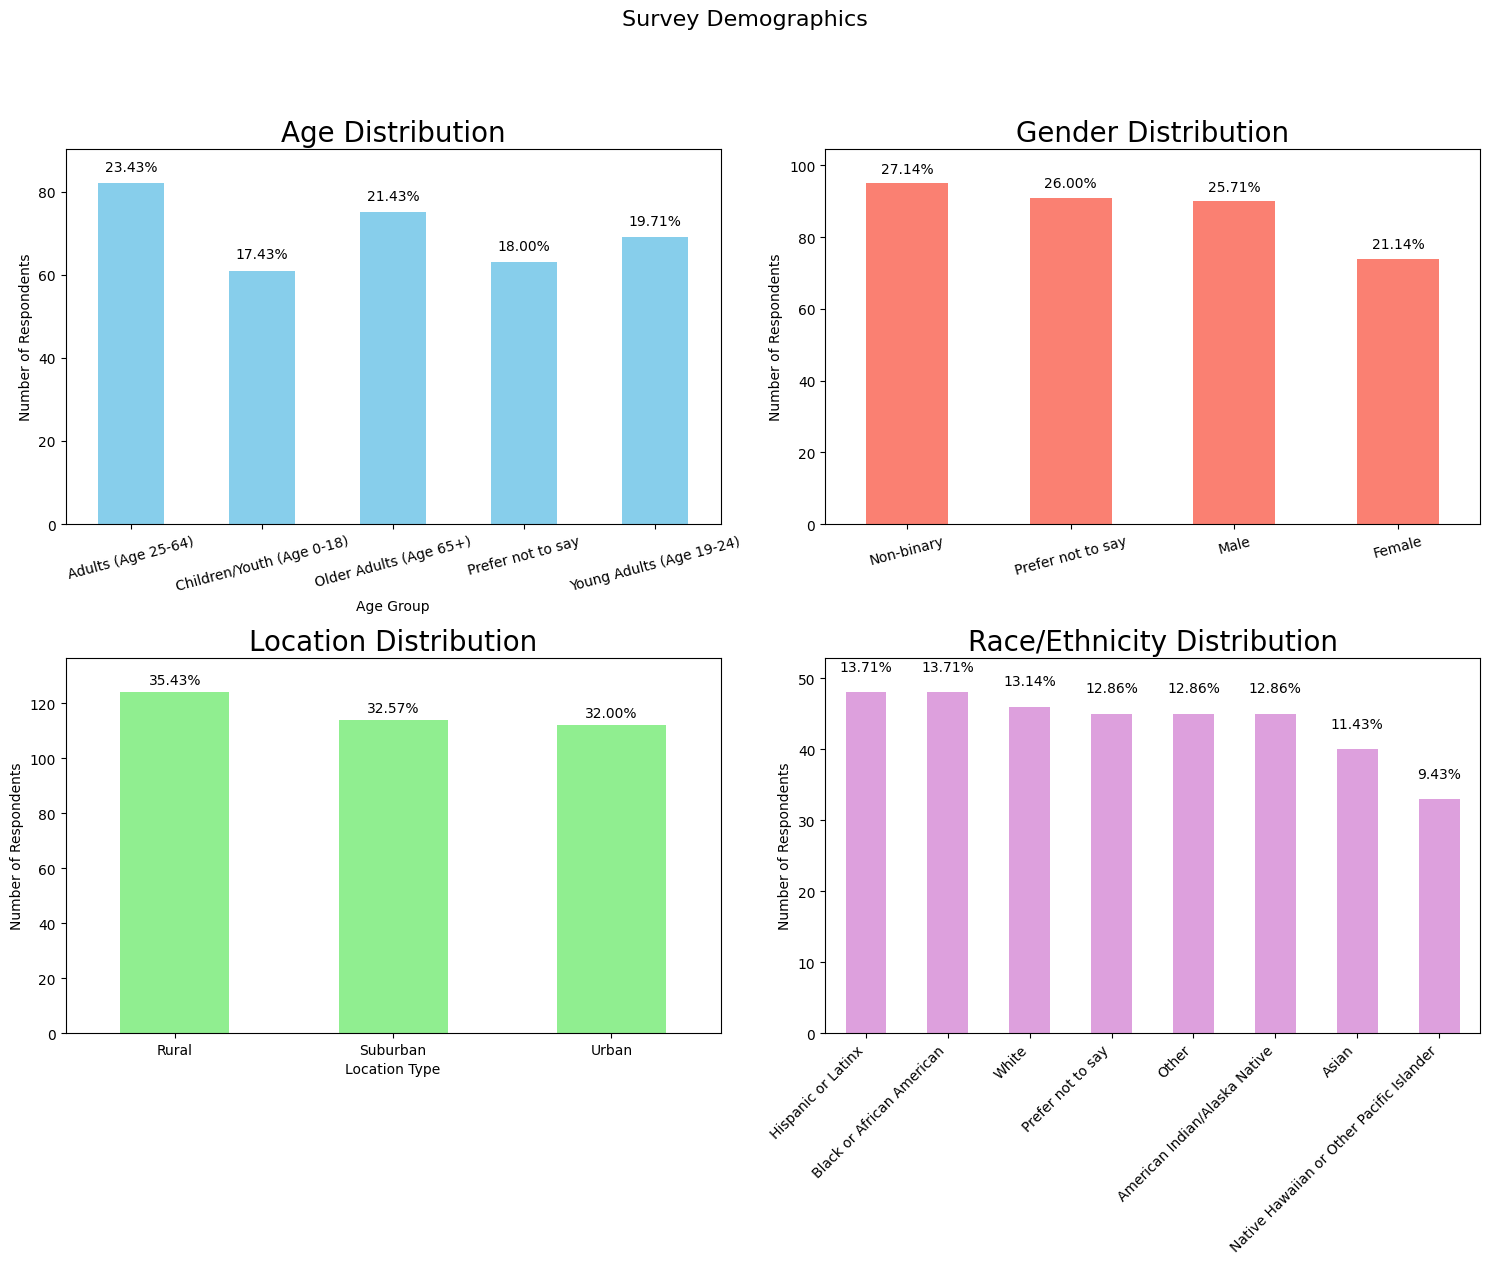

In [10]:
import matplotlib.pyplot as plt
#Set up figure and axes
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Survey Demographics', fontsize=16, y=1.05)

#Function to get percentage of each bar directly on top
def annotate_bars(ax):
    total = sum([p.get_height() for p in ax.patches])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100 * height/total),
                ha="center")
    ax.set_ylim(0, 1.10 * max([p.get_height() for p in ax.patches]))

        
#Create 2x2 subplots of different distributions

#Age Distribution
df_survey_cleaned['Age'].value_counts().sort_index().plot(kind='bar', ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Age Distribution', fontsize=20)
axs[0, 0].set_ylabel('Number of Respondents')
axs[0, 0].set_xlabel('Age Group')
axs[0, 0].tick_params(axis='x', rotation=15)
annotate_bars(axs[0, 0])

#Gender Distribution
df_survey_cleaned['Identified Gender'].value_counts().plot(kind='bar', ax=axs[0, 1], color='salmon')
axs[0, 1].set_title('Gender Distribution', fontsize=20)
axs[0, 1].set_ylabel('Number of Respondents')
axs[0, 1].tick_params(axis='x', rotation=15)
annotate_bars(axs[0, 1])

#Location Distribution
df_survey_cleaned['Describe Your Location'].value_counts().plot(kind='bar', ax=axs[1, 0], color='lightgreen')
axs[1, 0].set_title('Location Distribution', fontsize=20)
axs[1, 0].set_ylabel('Number of Respondents')
axs[1, 0].set_xlabel('Location Type')
axs[1, 0].tick_params(axis='x', rotation=0)
annotate_bars(axs[1, 0])

#Race/Ethnicity Distribution
df_survey_cleaned['Select Your Race/Ethnicity'].value_counts().plot(kind='bar', ax=axs[1, 1], color='plum')
axs[1, 1].set_title('Race/Ethnicity Distribution', fontsize=20)
axs[1, 1].set_ylabel('Number of Respondents')
axs[1, 1].tick_params(axis='x', rotation=45)
for label in axs[1, 1].get_xticklabels():
    label.set_horizontalalignment('right')
annotate_bars(axs[1, 1])

#Adjust layout
plt.tight_layout()
plt.show()

To understand who has participated in the survey, we've visualized the demographic details of our respondents. These visuals give us a clear picture of the age groups, genders, locations, and racial/ethnic backgrounds of those who took part in the survey:

### Age Distribution: 
This shows us the range of ages of the respondents. We can see how many people fall into each age group.
### Gender Distribution: 
Here, we can see the gender breakdown of our respondents, showing how many identified as male, female, or other categories.
### Location Distribution: 
This gives us a sense of where our respondents are located. Are they from urban areas, suburban areas, or rural regions?
### Race/Ethnicity Distribution: 
This shows the racial and ethnic diversity of our survey participants.

The percentages on top of each bar tell us the proportion of respondents in each category. This helps us quickly gauge the most common responses.

### In the survey, respondents described their roles in the creative sector using various terms. We've summarized these descriptions into shorter role names for clarity.

Now, let's take a look at a visual representation:

The chart below shows how many people identified with each role. The roles are listed from top to bottom. This gives us a quick understanding of which roles are most represented in our survey.

/usr/local/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


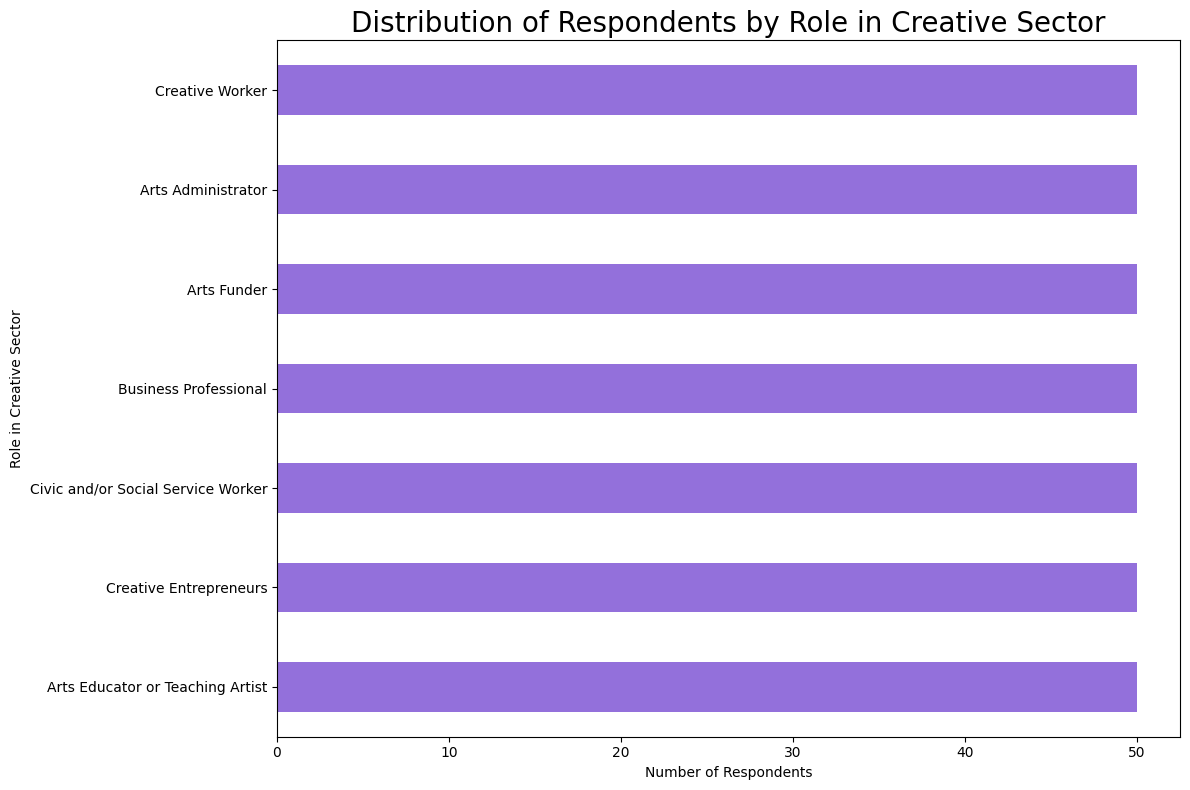

In [11]:
# Correctly map lengthy descriptions to shorter role names using .loc[]
df_survey_cleaned.loc[:, 'Short_Role'] = df_survey_cleaned['Describe Your Primary Role in Creative Sector'].str.extract('({})'.format('|'.join(roles_mapping.values())), expand=False)

# Plotting distribution using shorter role names
plt.figure(figsize=(12, 8))
df_survey_cleaned['Short_Role'].value_counts().plot(kind='barh', color='mediumpurple')
plt.title('Distribution of Respondents by Role in Creative Sector', fontsize=20)
plt.xlabel('Number of Respondents')
plt.ylabel('Role in Creative Sector')
# Invert the y-axis to display the role with the highest count at the top
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


From the survey's demographics and the visual representations provided:

### Age: 
A diverse age group has participated in the survey, with representation from various age brackets.

### Gender: 
Both males and females have actively participated, with a good amount of  representation from other gender categories as well.

### Location: 
The respondents hail from different types of locations, including urban, suburban, and rural areas, showcasing a broad geographical reach of the survey.

### Race/Ethnicity: 
The survey has captured the views of individuals from various racial and ethnic backgrounds, indicating its inclusiveness.

Regarding their roles in the creative sector:

### Creative Entrepreneurs:
Form a significant portion of the respondents, indicating a strong entrepreneurial spirit within the creative community.

### Creative Workers and Arts Administrators: 
Have a noticeable presence, showcasing the backbone of the creative industry.

The survey also includes insights from Arts Educators, Arts Funders, Business Professionals, and Civic and/or Social Service Workers, highlighting its comprehensive coverage of the creative ecosystem.

In summary, the survey has successfully captured a wide spectrum of individuals from the creative community in Nashville, both in terms of demographics and their roles in the sector.

### 2. Which questions are answered by which roles?

To understand which questions were answered by participants from different roles, we've broken down the survey responses by role and question.

We created a table where each column represents a distinct role in the creative sector and each row represents a specific survey question. In this table, the entries show how many individuals from each role answered a particular question.

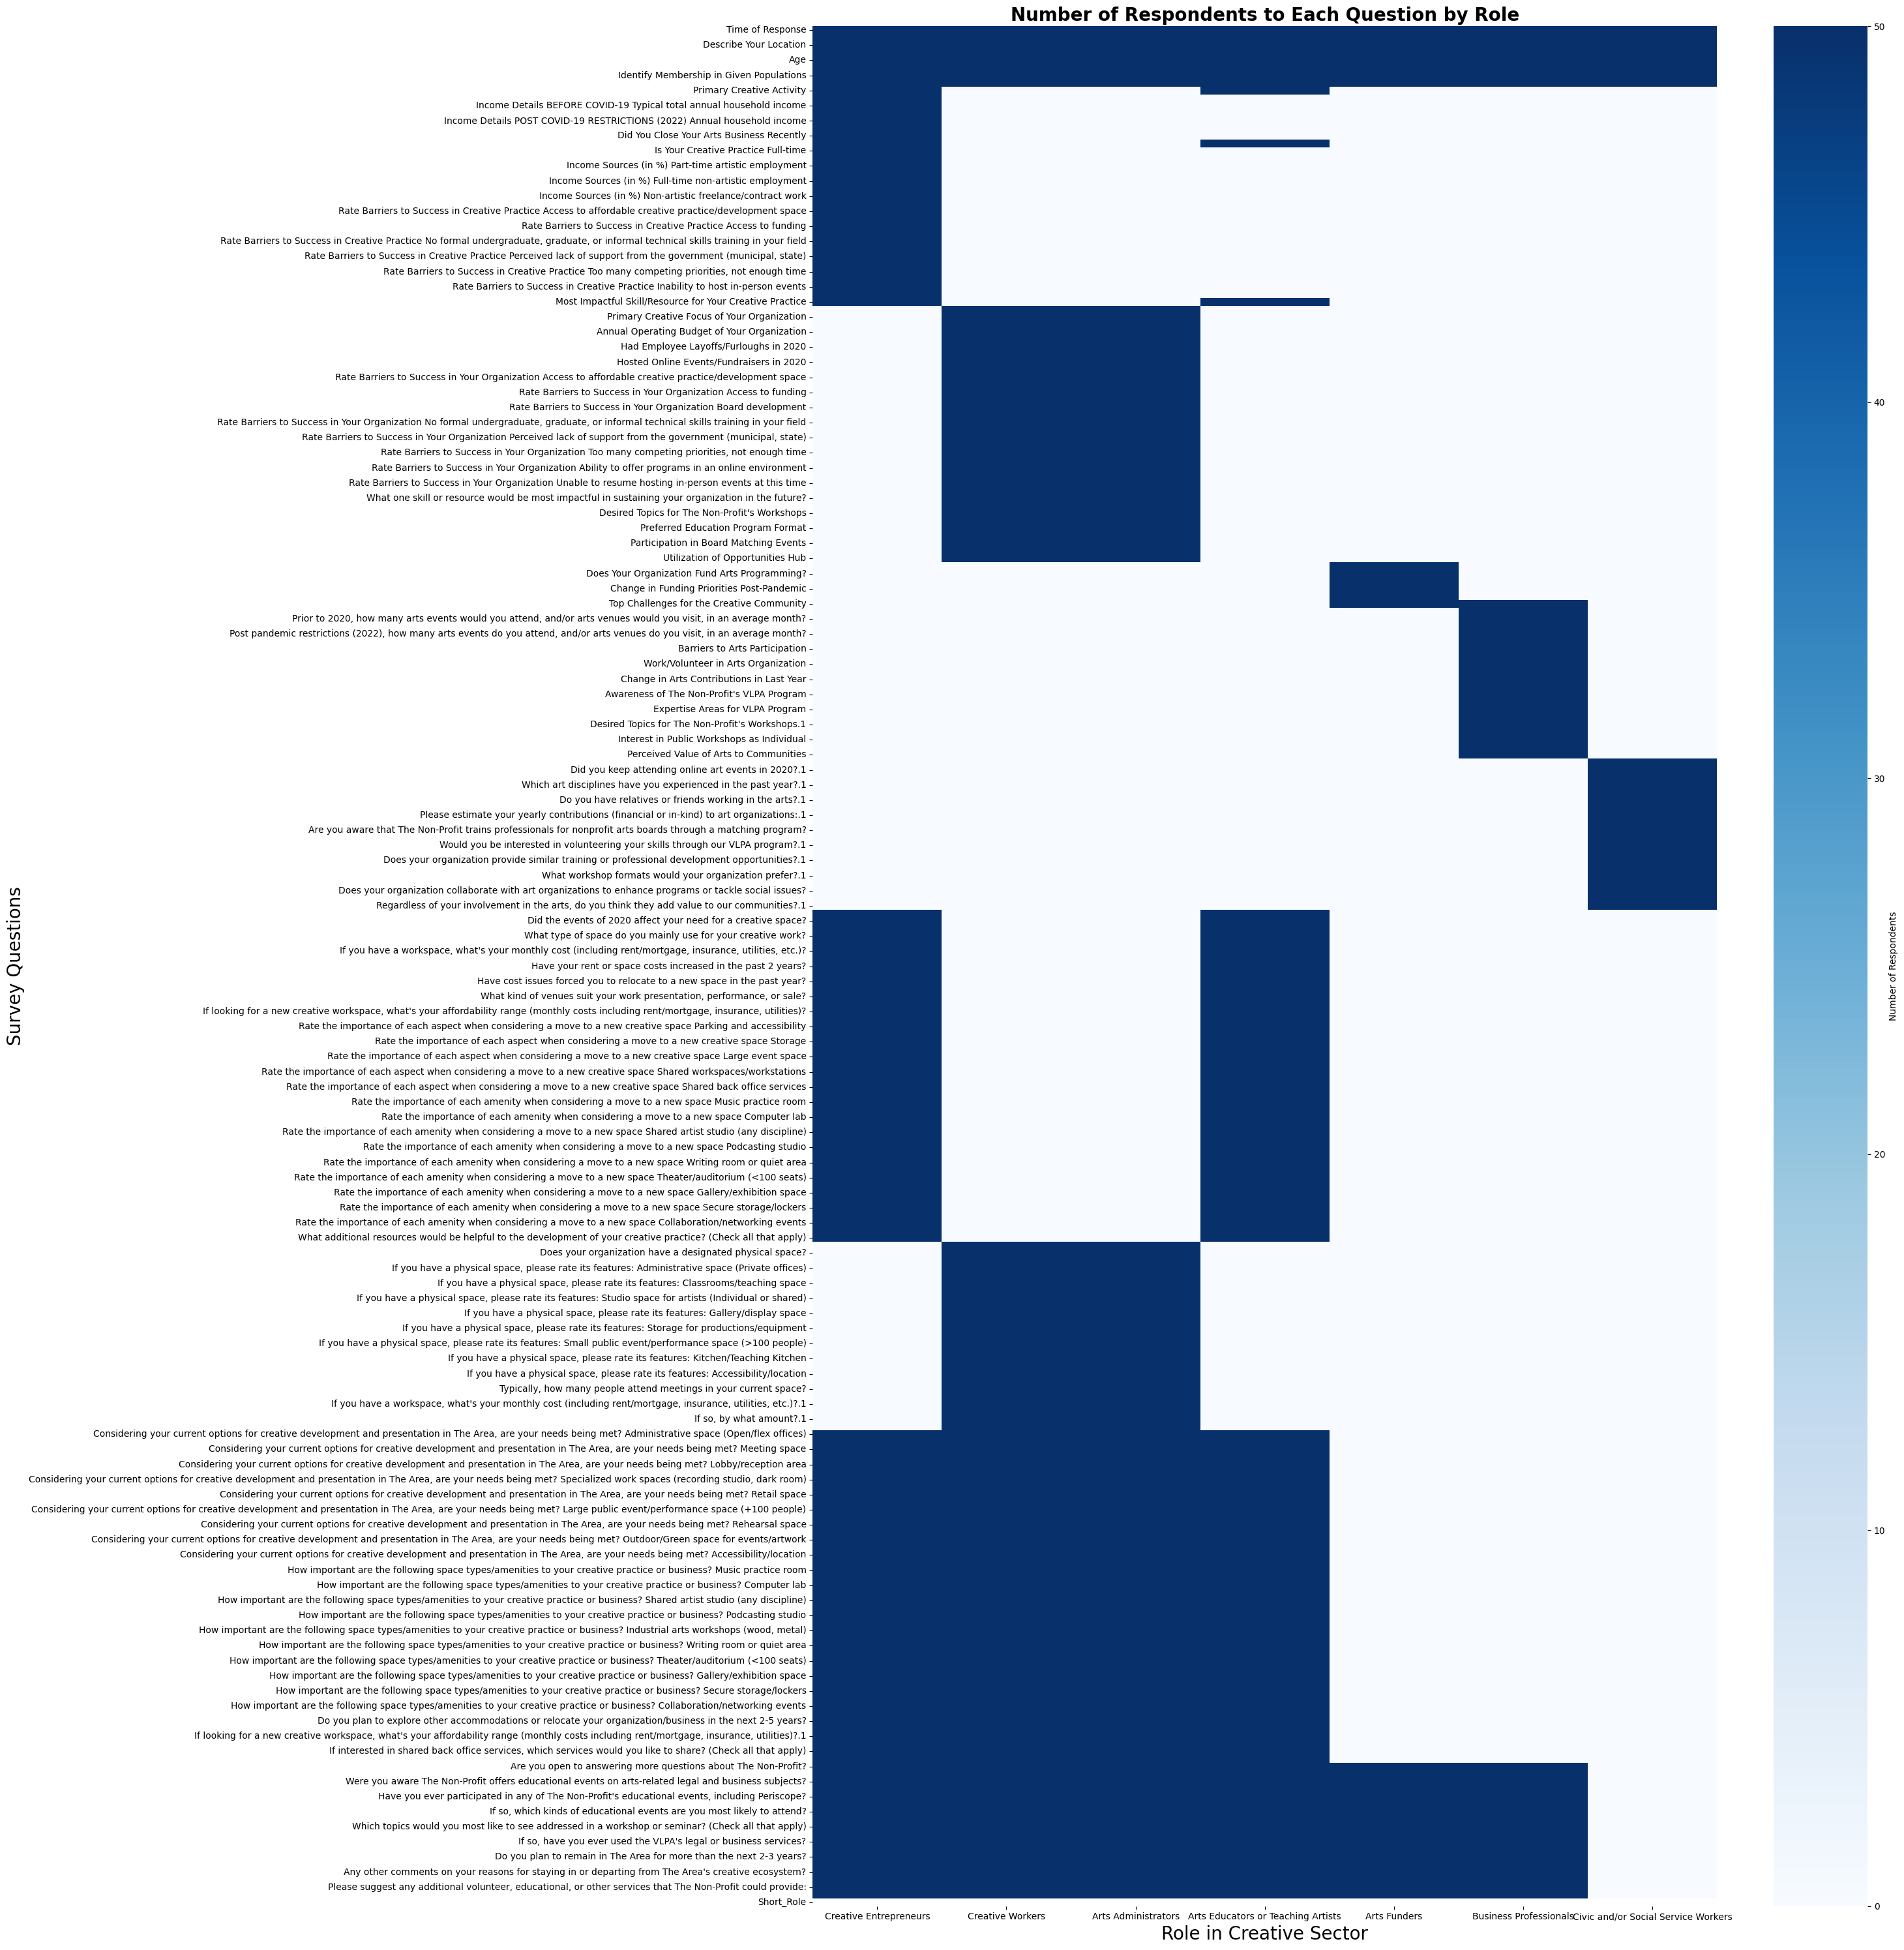

In [12]:
#Grab the role names again
roles = [
    "Creative Entrepreneurs",
    "Creative Workers",
    "Arts Administrators",
    "Arts Educators or Teaching Artists",
    "Arts Funders",
    "Business Professionals",
    "Civic and/or Social Service Workers"
]

#Create a dataframe with columns representing each role and rows representing each question
role_response_counts = pd.DataFrame(index=df_survey_cleaned.columns, columns=roles)

#Populate dataframe with count of non-NaN answers for each question in the role-specific dataframe
for role, df in df_roles_final.items():
    role_response_counts[role] = df.notna().sum()

import seaborn as sns

#Plotting heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(role_response_counts, cmap="Blues", cbar_kws={'label': 'Number of Respondents'})
plt.title('Number of Respondents to Each Question by Role', fontsize=20, fontweight="bold")
plt.xlabel('Role in Creative Sector', fontsize=20)
plt.ylabel('Survey Questions', fontsize=20)
plt.tight_layout()
plt.show()

To understand which questions were answered by participants from different roles, we've broken down the survey responses by role and question.

We created a table where each column represents a distinct role in the creative sector and each row represents a specific survey question. In this table, the entries show how many individuals from each role answered a particular question.

To evaluate the effectiveness of our data cleaning and preprocessing steps, it's useful to compare the refined data with the original, raw dataset.

Here, we've visualized the response rates for each question by role, but this time using the initial, unprocessed survey data. This visualization is similar to the previous one, but it provides a snapshot of how the data looked before we made any corrections or filled in missing values.

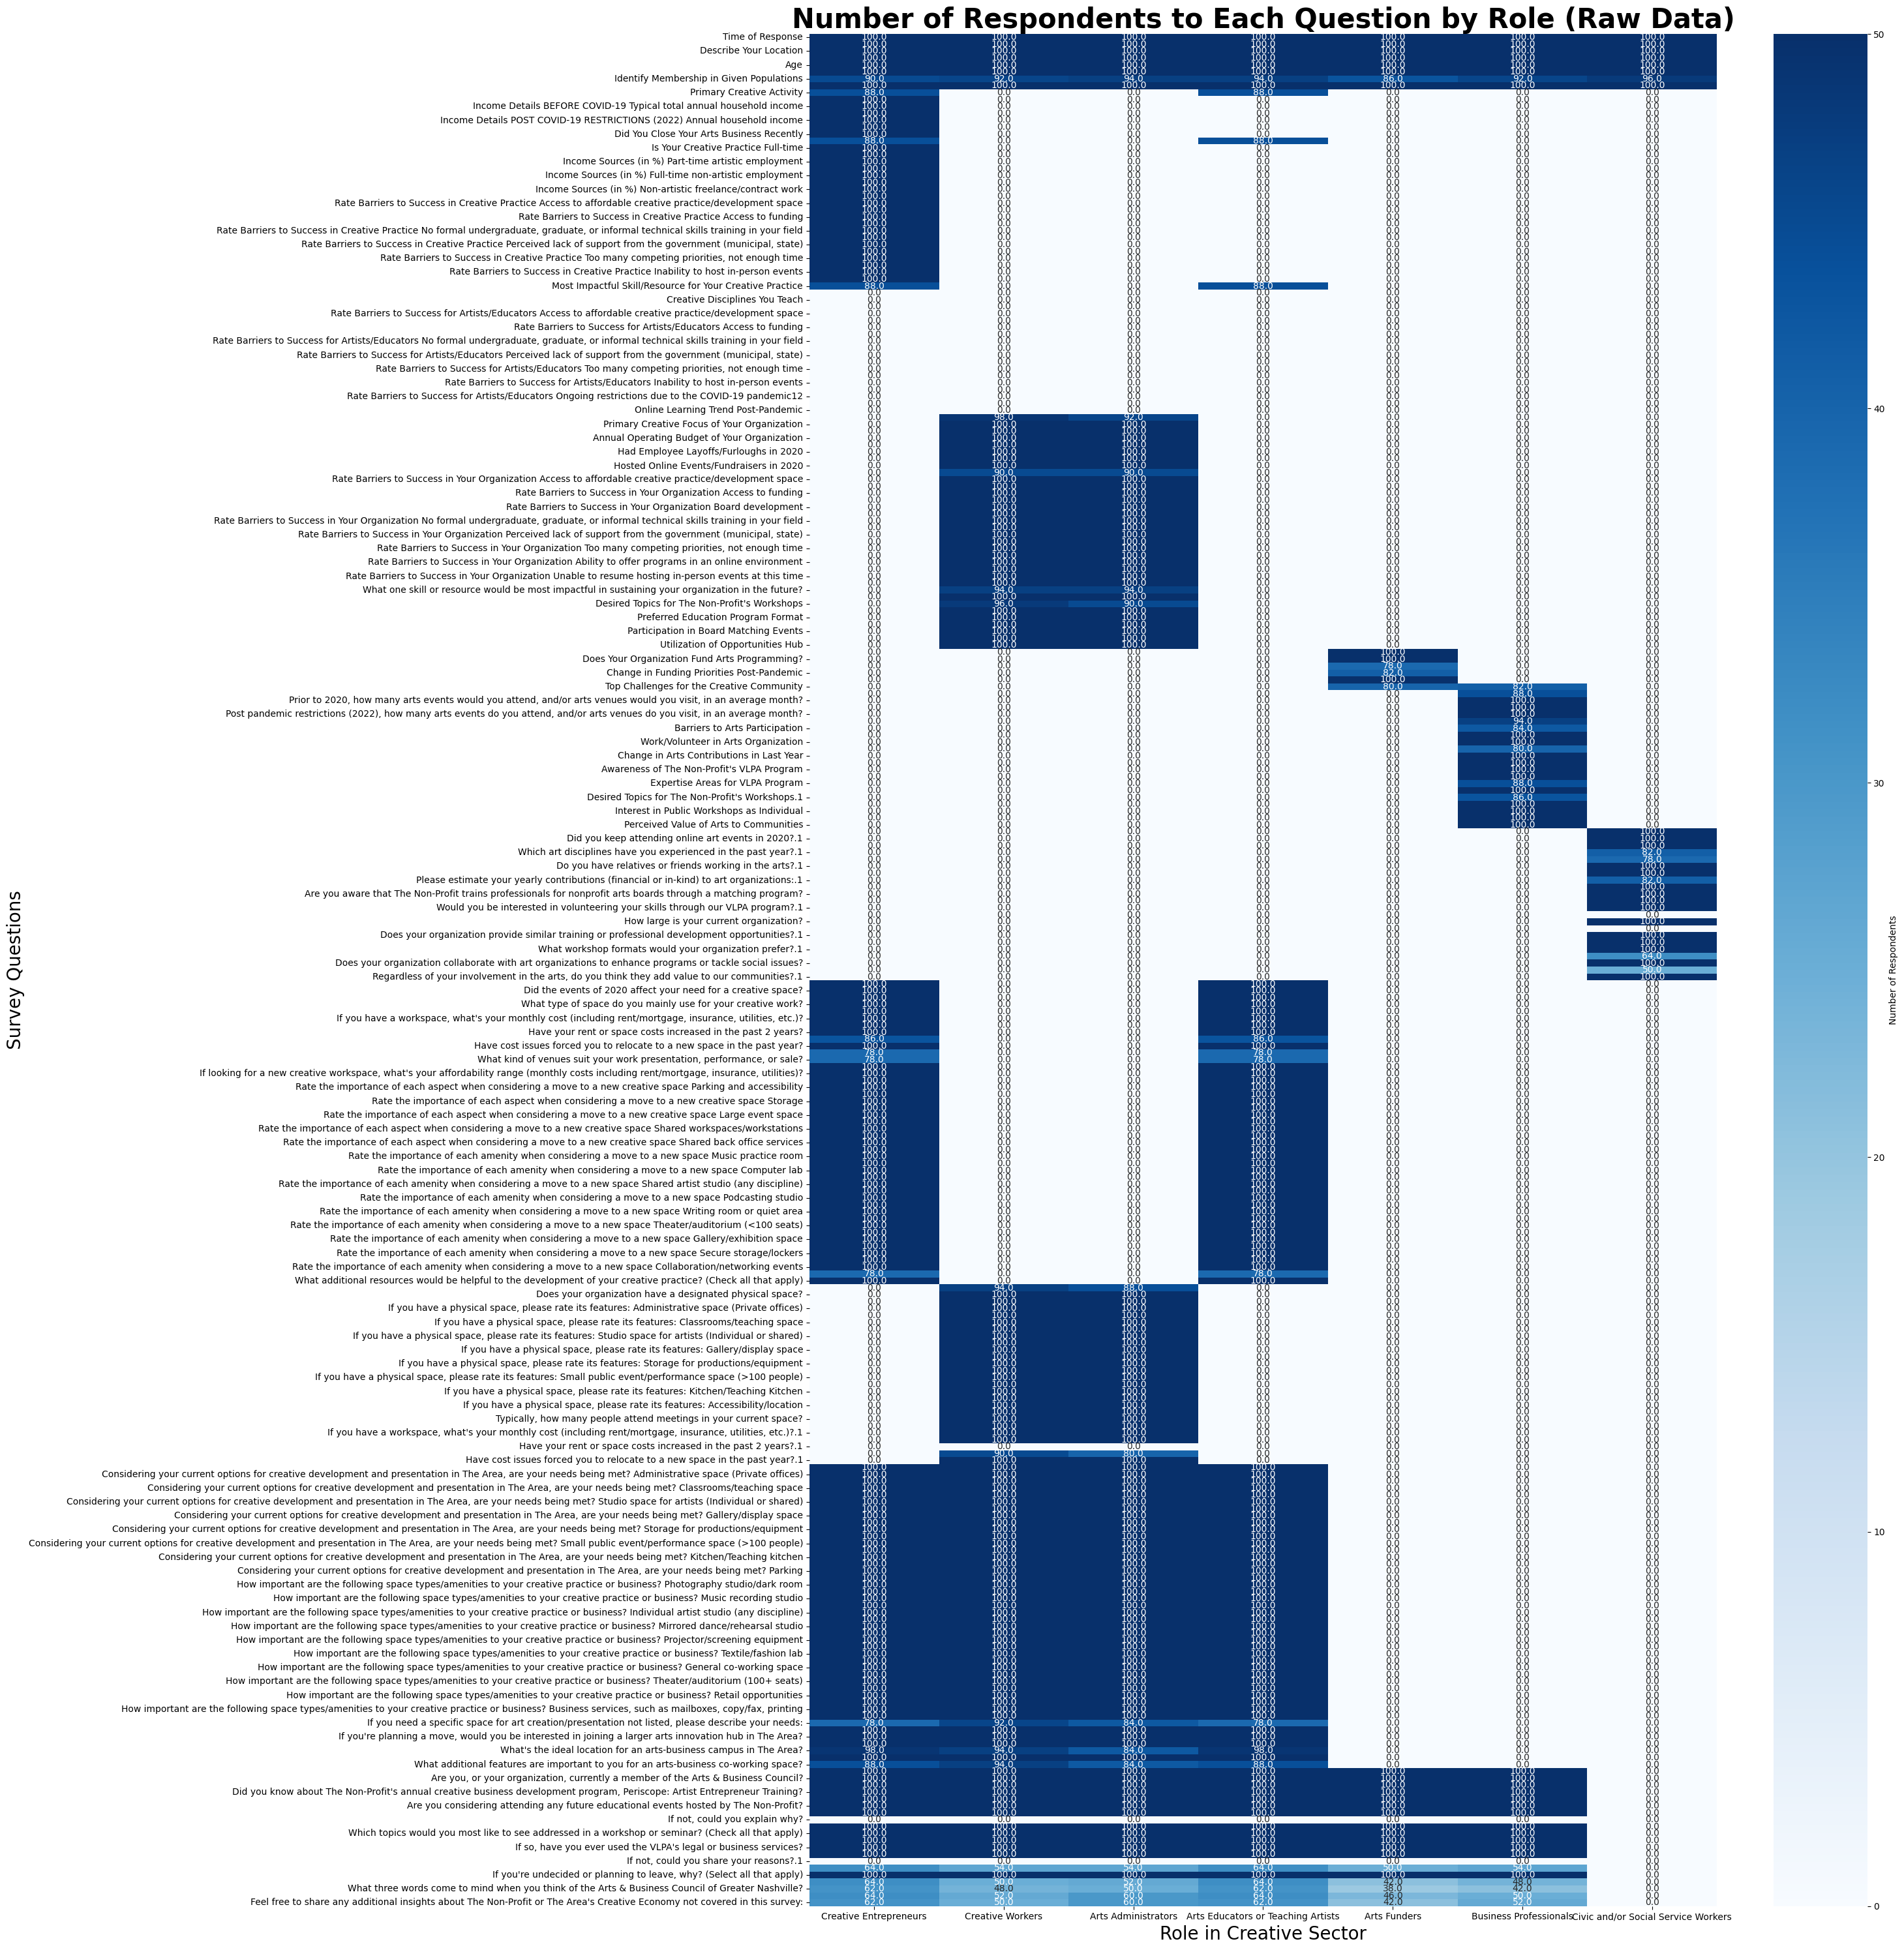

In [13]:
#Produce the same plot but with the raw dataset to show the difference before & after preprocessing
role_response_counts_original = pd.DataFrame(index=df_survey.columns, columns=roles)

#Populate dataframe with count of non-NaN answers for each question in the original dataframe
for role, mapped_role in roles_mapping.items():
    df_role = df_survey[df_survey["Describe Your Primary Role in Creative Sector"].str.contains(mapped_role, na=False)]
    role_response_counts_original[role] = df_role.notna().sum()

#Recalculate percentage of answers per question per role
total_respondents_per_role_original = df_role.shape[0]  # Using the last df_role for total count, assuming each role has the same number of respondents
percentage_responses_original = (role_response_counts_original / total_respondents_per_role_original) * 100

#Plotting the heatmap with annotations for percentage using the original dataframe
plt.figure(figsize=(30, 30))
sns.heatmap(role_response_counts_original, cmap="Blues", annot=percentage_responses_original, fmt=".1f", cbar_kws={'label': 'Number of Respondents'})
plt.title('Number of Respondents to Each Question by Role (Raw Data)', fontsize=30, fontweight="bold")
plt.xlabel('Role in Creative Sector', fontsize=20)
plt.ylabel('Survey Questions', fontsize=20)
plt.tight_layout()
plt.show()


The survey has garnered responses from a diverse array of roles within Nashville's creative community, including:

### Creative Entrepreneurs: 
This group is prominently represented in the survey, showcasing the voices of those at the forefront of innovative ventures in the creative sector.

### Creative Workers: 
These individuals, actively immersed in the day-to-day creative processes, also have a strong presence in the survey responses.

### Arts Administrators: 
Their insights are well-captured, providing a managerial and organizational perspective to the data.

### Arts Educators or Teaching Artists: 
The survey has effectively tapped into the views of those shaping the next generation of artists and creatives.

### Arts Funders: 
While not as numerous as some other roles, their perspectives are invaluable, given their influence on which creative projects receive funding and support.

### Business Professionals: 
Their involvement in the survey underscores the interplay between the creative sector and the broader business community.

### Civic and/or Social Service Workers: 
Their responses add a unique dimension, highlighting the intersection of art with civic and social initiatives.

Comparing the heatmaps of the raw and processed data, we notice an enhancement in data completeness after the preprocessing stage. Initially, several gaps indicated unanswered questions, especially among specific roles. However, after data cleaning and filling in missing values, the heatmap of the processed data presents a more comprehensive picture, suggesting broader engagement across roles and questions.



## Evaluating the Survey's Representation

To make insightful and effective decisions based on our survey, it's essential to gauge how well our dataset mirrors the broader creative community. Let's delve into the key factors that determine the representativeness of our survey data:

### 3. In looking at the percentage of respondents based on demographics, how representative of each population do you think the results will be? In other words, by what decomposition does it seem that the data is actionable?

When evaluating the representativeness of our survey data, several factors come into play:

Sample Size: The number of respondents is crucial. While a large sample size generally gives more confidence in the insights derived, it's essential to assess the number in relation to the specific group. For instance, if our survey has feedback from only 2 Funders, it may not provide a full understanding of the entire Funder community's views.

Demographic : It's vital to ensure our survey represents the diverse backgrounds within the creative community. If, for example, most of our respondents come from a particular age group or race, the results could lean heavily towards their experiences and views.

Role Diversity: Our heatmap showed roughly 50 responses for each role. Sounds even, right? But, what if in the real Nashville scene there are many more Creative Workers than Arts Funders? Our survey could then be giving an amplified voice to Arts Funders.

Survey Design Influences: The way we structure and phrase our questions can impact the responses. It's always worth remembering this when interpreting the data.

Purpose of the Survey: The non-profit company's objectives play a role in how the data should be interpreted. If the company plans on making significant policy changes or resource allocations based on this survey, they should exercise caution, especially if the feedback from a particular group is limited. On the other hand, for gaining initial insights or guiding further detailed research, even feedback from smaller groups can be invaluable.

External Validation: Cross-referencing our survey results with other data sources or studies can provide a more comprehensive view and validate our findings.

In conclusion, our survey offers a rich tapestry of insights from Nashville's creative community. However, as with all data, it's essential to recognize its nuances and potential limitations. When used thoughtfully and in conjunction with other data, it can be an invaluable tool in shaping strategies and initiatives for the creative sector.